{}
## Task 1 : Import pandas and load data


In [329]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from collections import Counter

In [270]:
path_file = 'D:\Desktop\Data Analyst\Python\Sale_Analyst\data\sales2019_1.csv' # absolute path 
dataframe = pd.read_csv(path_file) # read file csv
dataframe # show dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


## Task 2: Clean and Prep data

# Task 2.1 : Merge 12 month data 

In [272]:
# Set the directory where the CSV files are located
directory = 'D:\Desktop\Data Analyst\Python\Sale_Analyst\data'

# Create an empty list to store the data
data = []

# Create an empty list to store the number of rows in each file
all_length =[]

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        filepath = os.path.join(directory, filename) # Create the full filepath by using os.path.join()
        with open(filepath, 'r') as f: 
            reader = csv.reader(f)
            rows = list(reader)
            if filename != 'sales2019_1.csv': # Remove header row from all files except the first file
                rows = rows[1:]
            data += rows
            all_length.append(len(rows)) # Append the number of rows of each file csv to the all_length list

# Write the combined data to a new CSV file
with open('sale_all_2019.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Read the new CSV file back into Python as a dataframe using Pandas
df = pd.read_csv('sale_all_2019.csv') 
df = df.reset_index(drop=True)#drop index because the dataframe is not needed column index( first collum left to right) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [273]:
print(sum(all_length)) # Check number row in 12 file  =  number rows of dataframe after merge ?

186851


# Task 2.2 : Add "month" column

In [274]:


# Add a new column 'month' to the DataFrame and assign "Month"  = get the first 2 characters of the order date column
df['Month'] = df['Order Date'].str[0:2]


# Print the updated DataFrame
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [275]:
print(set(df['Month'])) # Check value in month in dataframe

{'04', '09', '11', 'Or', '05', '07', '12', '03', '01', '02', '08', '06', '10', nan}


# Task 2.3: Delete 'nan' and 'Or' value in Month and Oder Date column

In [276]:
df.dropna(inplace=True) # drop value 'nan'
# df = df[~df['Order Date'].str.contains('Or')]
print(set(df['Month'])) # Check month in dataframe

{'04', '09', '11', 'Or', '05', '07', '12', '03', '01', '02', '08', '06', '10'}


In [277]:
df[df['Month'] == 'Or'] # Check value 'Or' in dataframe']]

df = df[df['Month'] != 'Or'] # Delete value 'Or' in df
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Task 3: Reporting 

# Task 3.1: What was the best month for sale ? How much earned that month ?

In [278]:
print(df['Quantity Ordered'].dtype)# Check type data of column 'Quantity Ordered'
print(df['Price Each'].dtype)# Check type data of column 'Price Each'

object
object


In [279]:
# Convert the 'Quantity Ordered' and 'Price Each' columns to integers and floats respectively
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [280]:
#add new column 'Sale' 
df['Sale'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [281]:
# move column 'Sale' to the next Price Each
col = df.pop('Sale') # Remove 'Sale' and store it in 'col'
df.insert(4, 'Sale', col) 
# insert column have name 'Sale' into the 4th position
# Position 4 is the position in the right column Price each
# col is the Series that contains the data for the 'Sale' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [282]:
# Calculate the sum of sales in each month
df.groupby('Month')['Sale'].sum()

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sale, dtype: float64

In [284]:
sales_sum = df.groupby('Month')['Sale'].sum()
sales_sum.max()

4613443.34

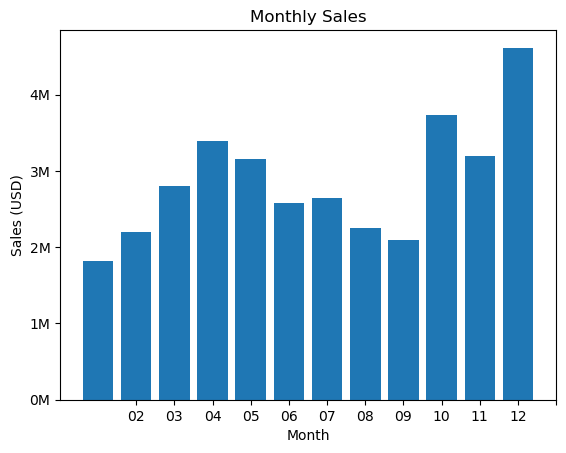

In [285]:
# Create the Column chart Monthly Sales
months = range(1, 13)
#plt.bar(x = months, height = sales_sum)
fig , ax = plt.subplots()
ax.bar(sales_sum.index, sales_sum.values)

plt.xticks(months) # add odd number in X-axis

# format the y-axis labels 1e6 to 1M
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x/1000000)))

# add labels and title
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.title('Monthly Sales')

# display the chart
plt.show()

# Task 3.2: What city has the best sales ?


In [286]:
# add column 'City' to dataframe

# extract city using apply() and lambda function
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
# The "apply()" function is used to apply a function (lambda) to each element of the "Purchase Address" column

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [287]:
# Calculate sales for each city
df.groupby('City')['Sale'].sum().reset_index()

,City,Sale
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [288]:
city_sales = df.groupby('City')['Sale'].sum()
# Use .reset_index() will be the bug when create chart below
city_sales.max()

8262203.91

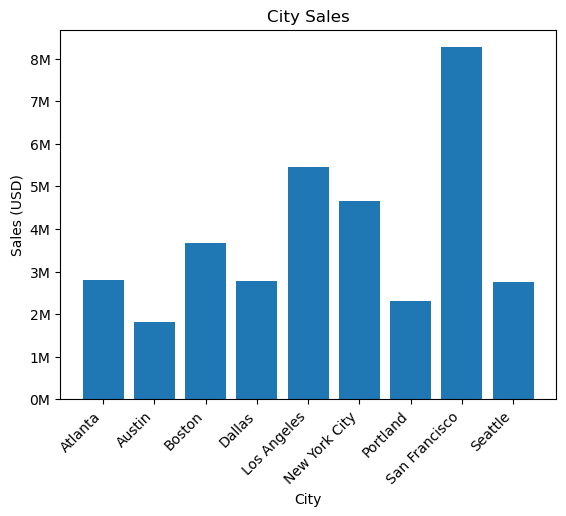

In [289]:
# create the Column chart City Sales

# define a function to format y-axis labels
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x/1000000)

# create chart
# KeyWord : Loop through series in pandas 
plt.bar(city_sales.index , city_sales.values) # index = city name, values = sales in groupby city in above

# adjust x-axis labels
plt.xticks(rotation=45, ha='right') # rotate 45 degree and align right

# format the y-axis labels using the millions_formatter function - Convert 1e6 to '1M'
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# add labels and title
plt.xlabel('City')
plt.ylabel('Sales (USD)')
plt.title('City Sales')

# display the chart
plt.show()

# 3.3 What time ( what hour in day) should we display advertising to maximize the likelihood of customers's buying products ?

In [290]:
# Add column 'Hour' to dataframe

# convert "Order Date" column to datetime type
df["Order Date"] = pd.to_datetime(df["Order Date"])

# create "Hours" column using the hour component of the date-time values
df["Hours"] = df["Order Date"].apply(lambda x: x.hour)


df.head ()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [291]:
#group by based on order number
df.groupby('Hours')['Sale'].count()

Hours
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sale, dtype: int64

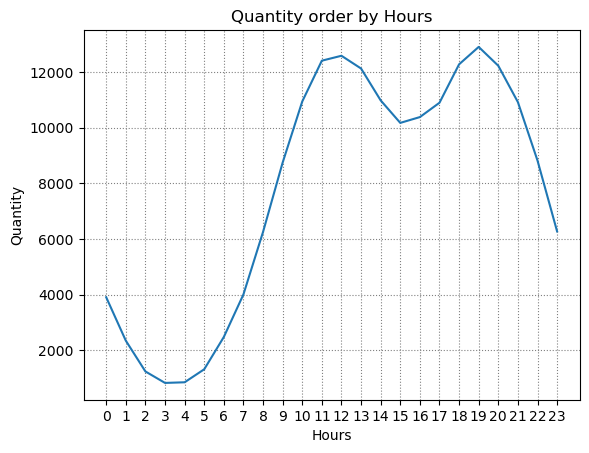

In [301]:
# Create the Lines chart Quantity order by Hours

hours_sales = df.groupby('Hours')['Sale'].count()
# count not sum because we want customers buy as many orders as possible


plt.xticks(hours_sales.index) # add odd number in X-axis

# Create line chart
plt.plot(hours_sales.index , hours_sales.values) # index = hours, values = sales in groupby hours in above

# add a matte grid
plt.grid(True, linestyle=':', color='gray')

# add labels and title
plt.xlabel('Hours')
plt.ylabel('Quantity')
plt.title('Quantity order by Hours')

# display the chart
plt.show()

# Task 3.4: What products are most often sold together ?

In [317]:
# Copy df to df_dup to use the next step
df_dup = df 

# ADD column 'All Product' to dataframe have all product have the same order ID
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))



In [318]:
# Take the duplicate rows based on 'Order ID' column ( have same Order ID)
df_dup = df_dup[df_dup.duplicated(['Order ID'], keep=False)]
df_dup


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours,All Product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [335]:
# Drop the duplicate rows have the same Order ID
df_dup = df_dup.drop_duplicates(subset='Order ID', keep='first')


In [337]:
# Count the number of times any 2 values ​​in rows are repeated in column "All Product".
# Rows of column "All Product" contain words >= 2 values ​​in each row
# Example
# Input:
# All Product
# iPhone, Lightning Charging Cable 
# iPhone, Lightning Charging Cable
# iPhone, Lightning Charging Cable, Google Phone
# iPhone, USB-C Charging Cable, Lightning Charging Cable 
# Google Phone, iPhone, USB-C Charging Cable
# USB-C Charging Cable, iPhone, Google Phone  
# Output :
# iPhone, Lightning Charging Cable     4
# iPhone, USB-C Charging Cable         3
# iPhone, Google Phone                 3

# function to count the number of times any 2 values are repeated
def count_repeated_pairs(row):
    items = row.split(', ')
    c = Counter()
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            pair = sorted([items[i], items[j]])
            c[tuple(pair)] += 1
    return c

# apply the count_repeated_pairs function to the 'All Product' column
counts = df_dup['All Product'].apply(count_repeated_pairs).sum()

# convert the Counter object to a dictionary, then to a DataFrame
counts_df = pd.DataFrame.from_dict(dict(counts), orient='index', columns=['Count'])

# sort the DataFrame by the 'Count' column in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# display the top 10 products sold together
print(counts_df.head(10))


                                              Count
(Lightning Charging Cable, iPhone)             1015
(Google Phone, USB-C Charging Cable)            999
(Wired Headphones, iPhone)                      462
(Google Phone, Wired Headphones)                423
(Apple Airpods Headphones, iPhone)              373
(USB-C Charging Cable, Vareebadd Phone)         368
(Bose SoundSport Headphones, Google Phone)      228
(USB-C Charging Cable, Wired Headphones)        205
(Vareebadd Phone, Wired Headphones)             149
(Lightning Charging Cable, Wired Headphones)    129


# Task 3.5 : What product sold the most ? Why do you think it sold the most ?

# Task a : What product sold the most ?

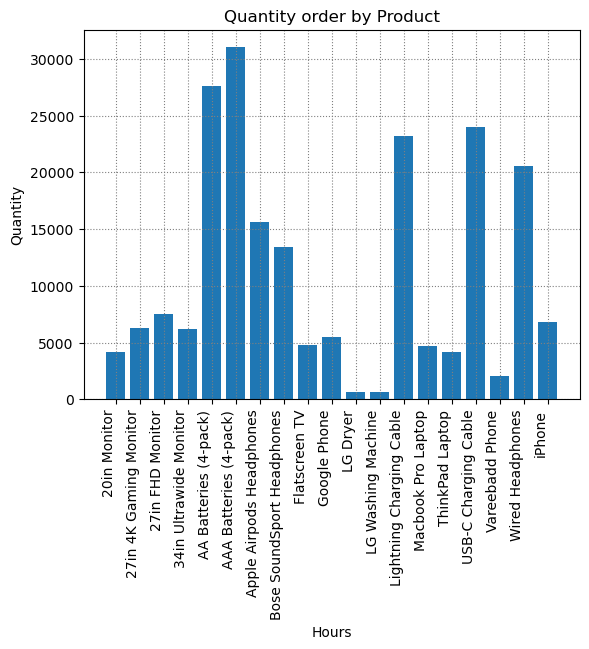

In [346]:
# Create the Collum chart Quantity Ordered by Product

quantity_order = df.groupby('Product')['Quantity Ordered'].sum()



# Create Column chart
plt.bar(quantity_order.index , quantity_order.values) # index = hours, values = sales in groupby hours in above

plt.xticks(rotation=90, ha='right') # rotate 90 degree and align right

# add a matte grid
plt.grid(True, linestyle=':', color='gray')

# add labels and title
plt.xlabel('Hours')
plt.ylabel('Quantity')
plt.title('Quantity order by Product')

# display the chart
plt.show()

# Task b : Why do you think it sold the most ?
# Price, Brand, Quality, Useful, ....

# Check how price affects the quantity order of each product


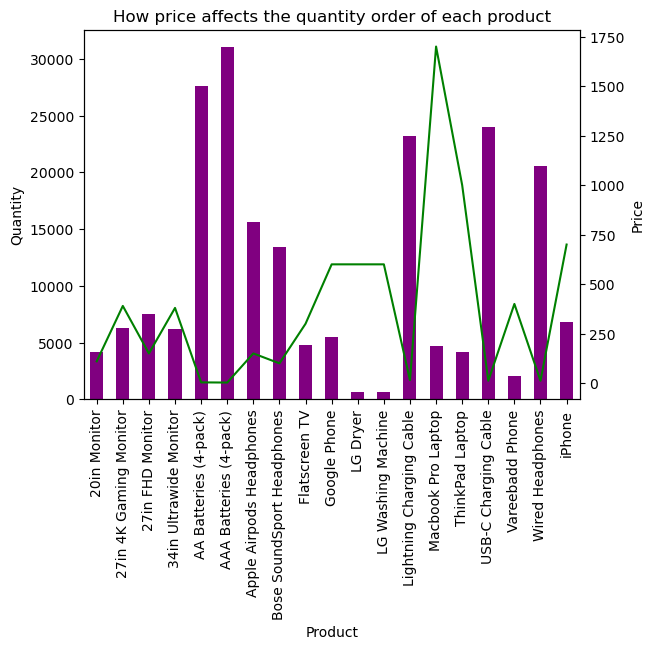

In [369]:
# Group the data by Product
grouped = df.groupby('Product')

# Calculate the mean price for each product
price_each = grouped['Price Each'].mean()

# Calculate the sum of quantity ordered for each product
quantity_order = grouped['Quantity Ordered'].sum()

# Create a DataFrame containing both the price and quantity data
data = pd.DataFrame({'Price': price_each, 'Quantity': quantity_order})

# Create a bar plot with the Quantity data on the left axis
ax = data['Quantity'].plot(kind='bar', color='purple')
ax.set_ylabel('Quantity')

# Create a line plot with the Price data on the right axis
ax2 = ax.twinx()
data['Price'].plot(kind='line', ax=ax2, color='green')
ax2.set_ylabel('Price')

# Add a title and rotate the x-axis labels
plt.title('How price affects the quantity order of each product')
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()
